## K평균 군집화를 위한 최적의 군집 수 구하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs   #blobs해서 덩어리
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#8차원 좌표에 3개의 클러스터 만들것(8차원이라 시각화는 불가능)
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123) #샘플 150, 8차원에 3개의 클러스터
X.shape

(150, 8)

### 1) "total internal sum of squares"를 계산하는 함수를 정의하라
#### HINT: 강의자료의 수식을 이용

함수에 들어가는 인자값 3개<br>
- X         :   데이터
- centers   :   센터로이드 위치 인자값
- clusters  :   클러스터 레이블 값을 담아놓는 인자값(kmeans로 계산한거넣음) <br><br>

In [3]:
def total_internal_ss(X, centers, clusters):   #centers안에는 8개칼럼 3개의 행의 데이터프레임, 
                                               #clusters는 하나의 열이며 레이블이 붙어있음(0번 클러스터)
    N_clusters = centers.shape[0]
    N_columns = centers.shape[1]
    N_rows = X.shape[0]
    closest_centers = np.zeros((N_rows, N_columns))  
    for n in range(N_clusters):
        indices = (clusters == n)
        for j in range(N_columns):
            closest_centers[indices,j] = centers[n,j]             
    return np.sum((X-closest_centers)**2.0)  

### 2) "total internal sum of squares" 대 "군집의 개수"를 시각화하고 변곡점을 찾아라

- 3개로 군집화 했는데 3개가 적당하다는 결론을 얻을 수 있는가?
        
- 개개좌표로 센트로이드 제곱하고 더해서 모든 클러스터에 동일하게 적용
        
- 산점도가 팔꿈치 모양대로 나오느냐 (3에서 변곡점이 생기냐) 이걸 확인하라는 문제

In [4]:
n_cluster = np.array(range(2,10))                   # Array that contains the number of clusters.
total_ss = np.array([])                             # Array that will contain the total internal sum of squares.
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_
    total_ss = np.append(total_ss, total_internal_ss(X,centers,clusters))

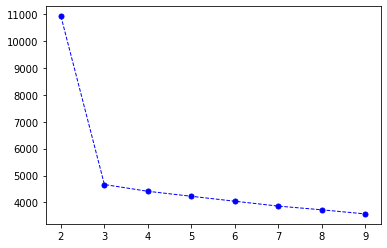

In [5]:
plt.plot(n_cluster,total_ss,color='blue',marker='o',linestyle='dashed',linewidth=1,markersize=5)
plt.show()